In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, ShuffleSplit
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, confusion_matrix,plot_roc_curve, plot_confusion_matrix , accuracy_score
from sklearn.svm import SVC

### 1. Explore data

In [2]:
data = pd.read_csv("data/dataBreastCancer.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Make a copy for transform data in new dataframe
df = data.copy()

# New diagnosis columns with 0 for Malignant, and 1 for Benign
df['diagnosisT'] = df['diagnosis'].replace({'M':0, 'B':1})

# Drop useless columns for analyse, Unnamed is a column wuth NaN item
df = df.drop(['id', 'diagnosis', 'Unnamed: 32',], axis=1)

df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisT
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


### 2. Visualise Data

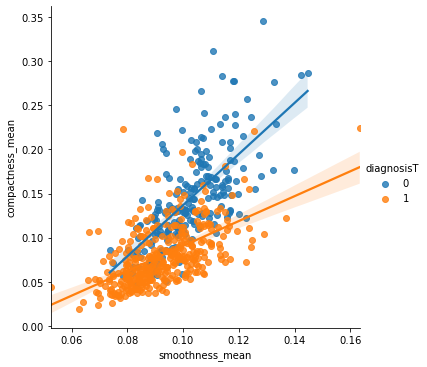

In [5]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosisT')

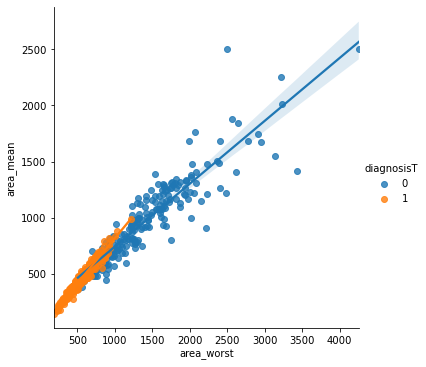

In [6]:
sns.lmplot(x ='area_worst', y = 'area_mean', data = df, hue = 'diagnosisT') 

As we can see, the data is rather divided into two very distinct groups regardless of the columns compared

### 3. Feature engineering 

In [7]:
m_col = df.median(axis = 1, skipna = True)

In [8]:
dfmed = df.copy()
dfmed = dfmed.fillna(m_col)

### 4. Declare the vector of characteristics and the target variable

In [9]:
X = dfmed.drop(["diagnosisT"], axis=1).values
y = dfmed["diagnosisT"].values

### 5. Divide the data into a separate training and test set 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8) 

### 6. Scaling data

In [11]:
scale = StandardScaler() 

X_train = scale.fit_transform(X_train) 
X_test = scale.transform(X_test)

### 7. Fit classifier 

In [12]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

### 8. Predict test data

In [13]:
pred = knn.predict(X_test)
pred_prob = knn.predict_proba(X_test)

In [14]:
print(pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0]


In [15]:
print(pred_prob)

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.07692308 0.92307692]
 [0.76923077 0.23076923]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.69230769 0.30769231]
 [1.         0.        ]
 [0.53846154 0.46153846]
 [0.76923077 0.23076923]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.92307692 0.07692308]
 [1.         0.        ]
 [1.         0.        ]
 [0.07692308 0.92307692]
 [0.07692308 0.92307692]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.07692308 0.92307692]
 [1.         0.        ]
 [1.         0.        ]
 [0.30769231 0.69230769]
 [1.         0.        ]


### 9. Check precision with zero precision

In [16]:
print(precision_score(y_test,pred))

first_score = accuracy_score(y_test,pred)
print(first_score)

print(classification_report(y_test, pred))

# 85 / 143  Divide the most frequently class on the total

0.9550561797752809
0.972027972027972
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.96      1.00      0.98        85

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Precision zero pour class 1 : __0,594__

Precision pour le model : __0,95__

The null precision corresponds to the precision of the most used class.
In this case class 1 poseede 85 element compare to 26 in class 0
We will therefore use class one we will divide by all the supports

We get 0.76 precision which remains correct but not sufficient

### 10. Reconstruct the kNN classification model using different values of k

In [17]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train, y_train)
pred2 = knn2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        58
           1       0.94      1.00      0.97        85

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [18]:
knn3 = KNeighborsClassifier(n_neighbors=15)
knn3.fit(X_train, y_train)
pred3 = knn3.predict(X_test)
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        58
           1       0.96      1.00      0.98        85

    accuracy                           0.97       143
   macro avg       0.98      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Trying some value of K but, that cant determine if the result are overfitted or no, we need a better way to define the optimal K

### 11. Confusion matrix

In [19]:
confusion_matrix(y_test, pred)

array([[54,  4],
       [ 0, 85]])

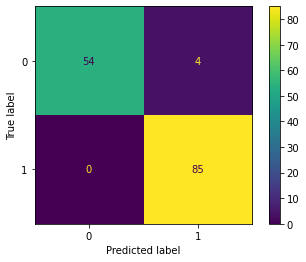

In [20]:
plot_confusion_matrix(knn, X_test, y_test)

### 12. Proba

In [21]:
pred_prob = knn.predict_proba(X_test)
print(pred_prob)

[[0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.07692308 0.92307692]
 [0.76923077 0.23076923]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.69230769 0.30769231]
 [1.         0.        ]
 [0.53846154 0.46153846]
 [0.76923077 0.23076923]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.        ]
 [0.92307692 0.07692308]
 [1.         0.        ]
 [1.         0.        ]
 [0.07692308 0.92307692]
 [0.07692308 0.92307692]
 [0.         1.        ]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.07692308 0.92307692]
 [1.         0.        ]
 [1.         0.        ]
 [0.30769231 0.69230769]
 [1.         0.        ]


Benin: 1
Malign: 0

There are two columns, the first on the left corresponds to Malign's proba and on the right benign

the sum of the two columns is is equal to 1 and for each element of the dataset, we determine the probability that they are Benin or Malin, if the left column is greater than 0.50 it will therefore be Malin, if it is less it will be benign, the right column is the reverse of this one

### 13. ROC - AUC

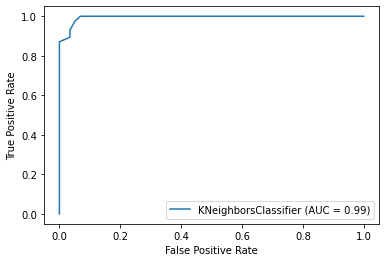

In [22]:
plot_roc_curve(knn, X_test, y_test)  
plt.show()

### 14. Use  K-Fold cross validation

In [23]:
kf = KFold(n_splits=5)

scores = []

for train_index, test_index in kf.split(dfmed):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            knn.fit(X_train, y_train)
            pred4 = knn.predict(X_test)
            scores.append(accuracy_score(y_test, pred4))
mean = round(np.mean(scores),4)
std = round(np.std(scores),3)

print("Liste score : %s"%scores)

print("Moyenne score : %s"%mean)

print("Ecart-Type : %s"%std)

Liste score : [0.8421052631578947, 0.9210526315789473, 0.9824561403508771, 0.956140350877193, 0.9469026548672567]
Moyenne score : 0.9297
Ecart-Type : 0.048


### Determine the best K

In [24]:
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
 
for k in range(1, 31, 2): 
    neighbors.append(k) 
    knnval = KNeighborsClassifier(n_neighbors = k) 
    scores = cross_val_score( 
        knnval, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 

By this way with can determine the optimal K, with a cross validation from different K values, compared to mistake error. To have the better accuracy from the better reliability.

best k :  13 


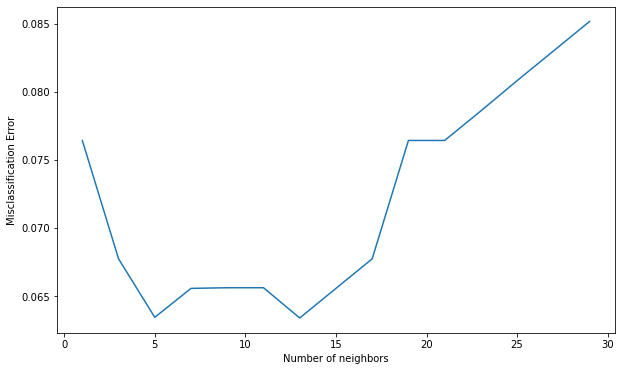

In [25]:
MSE = [1-x for x in cv_scores] 

best_k = neighbors[MSE.index(min(MSE))] 
print('best k : % d ' % best_k) 
  
plt.figure(figsize = (10, 6)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show() 

### 15. Result and conclude

After explore data, i have try KNN classifier with some value of K, with no way to know the K optimal, i use in first the recommanded K value => 10, we have a pair number of class so i use 11 in first time.

I get a very good Precision score, but this score is very too good to be sure.

So i check this.

I have check the Precision Zero to see the precision of the most represented class. I found 0,59, that not bad.

After this i try a Cross validation to valide my score with K FOLD
I use this for Accuracy, and i have see on several result, it was equivalent.
The the score was Valid.

I use after another cross validation, for found the optimal k, to have the best model.
_________________________________________________________

For conclude with this.

KNN is a good classifier for this dataset, i have try anytime a KNN model on a "word classification" with vectorisation and i found very bad result.

But with this type of dataset, the result is very good.

_________________________________________________________

This model can be used, but i found he must be better for medical 

### 16. Bonus : Implément your algorithme KNN.

In [26]:
class KNN():
    def __init__(self,k):
        self.k=k
        print(self.k)

    def fitclass(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train

    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
            distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i – x2_i)^2)
        return sqrt(distance)

    def nearest_neighbors(self,test_sample):
        distances=[]#calculate distances from a test sample to every sample in a training set
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
        distances.sort(key=lambda x:x[1])#sort in ascending order, based on a distance value
        neighbors=[]
        for i in range(self.k): #get first k samples
            neighbors.append(distances[i][0])
        return neighbors
    
    def predictclass(self,test_set):
        predictions=[]
        for test_sample in test_set:
            neighbors=self.nearest_neighbors(test_sample)
            labels=[sample for sample in neighbors]
            prediction=max(labels,key=labels.count)
            predictions.append(prediction)
        return predictions

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8) 

scale = StandardScaler() 

X_train = scale.fit_transform(X_train) 
X_test = scale.transform(X_test)

a = KNN(13)
a.fitclass(X_train, y_train)
classpred = a .predictclass(X_test)

print(accuracy_score(y_test, classpred))

print(first_score)

print(mean)

13
0.972027972027972
0.972027972027972
0.9297


We can see we have the same result, into first_score and class_score 

 ### 17. Bonus 2 : Comparer les résultats avec un autre algorithme de classification

In [28]:
svclass = SVC()

svclass.fit(X_train,y_train)
ypred = svclass.predict(X_test)

print(accuracy_score(y_test, ypred))

0.9790209790209791


In [29]:
cv2 = ShuffleSplit(n_splits=10, test_size=.20, random_state=42)
cv2.get_n_splits(X)

scores2 = cross_val_score(svclass, X, y, cv=cv2, scoring='accuracy')
print("Cross-validation Accuracy scores: {}".format(scores2))

print("Mean______________________________________________")
print(np.mean(scores2))

Cross-validation Accuracy scores: [0.94736842 0.92105263 0.93859649 0.88596491 0.90350877 0.94736842
 0.92982456 0.93859649 0.92982456 0.9122807 ]
Mean______________________________________________
0.925438596491228
